# SPAM REVIEW

In [20]:
#Text classification using machine learning Algorithms for BBC News
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_files
import sys
from time import time
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics
from sklearn.model_selection import train_test_split
import nltk

## Fetching & Training the data

In [21]:
bbcdir = r'C:\Users\deadpool\Documents\mini_project\spam.csv'
#names=['v1','v2']
bbc_train = pd.read_csv(bbcdir,encoding='latin-1')
data=bbc_train['v2']
target=bbc_train['v1']
bbc_train.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [22]:
from nltk.corpus import stopwords
import string
print(len(data))
print(bbc_train.shape)
bbc_train.drop_duplicates(inplace = True)
print(bbc_train.isnull().sum())
from sklearn.feature_extraction.text import CountVectorizer
bbc_vec = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize, encoding='latin-1')
bbc_counts = bbc_vec.fit_transform(data)
tfidf_transformer = TfidfTransformer()
bbc_tfidf = tfidf_transformer.fit_transform(bbc_counts)
print(bbc_tfidf.shape)
#X_train, X_test, y_train, y_test = train_test_split(messages_bow, bbc_train['spam'], test_size = 0.20, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(
    bbc_tfidf, target, test_size = 0.20, random_state = 12)
print('data loaded')

5572
(5572, 5)
v1               0
v2               0
Unnamed: 2    5126
Unnamed: 3    5159
Unnamed: 4    5164
dtype: int64
(5572, 4440)
data loaded


In [23]:
#bbc_train.target_names

##  Using the function

In [24]:
def benchmark(clf,name):
    print('_' * 80)
    print("Training: ")
	
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)
	
    t0 = time() 
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)
	
    score = metrics.accuracy_score(y_test, pred)
    kappa=metrics.cohen_kappa_score(y_test,pred)
    print("accuracy:   %0.4f" % score)
    print("\nHamming_loss=%0.4f" %metrics.hamming_loss(y_test,pred))
    print("Kappa Score:   %0.4f" %kappa)
    print("\nprecision score=%0.4f" %metrics.precision_score(y_test,pred,average='macro'))
    print("\nRecall Score=%0.4f" %metrics.recall_score(y_test,pred,average='macro'))
    print("\nF1-Score score=%0.4f" %metrics.f1_score(y_test,pred,average='macro'))
    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test, pred))
    print()
#     print("classification report:")
#     print(metrics.classification_report(y_test, pred,target_names=target_names))
    clf_descr = str(clf).split('(')[0]
    class_name =str(name).split('(')[0]
    return class_name, score,train_time, test_time

## Printing the Results

In [25]:
results = []
#RESULTS=[NAME_OF_ALGO ACCURACY TRAIN_TIME TEST-TIME]
for clf, name in ((RidgeClassifier(tol=1e-2, solver="sag"), "Ridge"),
                  (Perceptron(max_iter=50, tol=1e-3),"PPN"),
                  (PassiveAggressiveClassifier(max_iter=50, tol=1e-3),"PA"),
                  (KNeighborsClassifier(n_neighbors=10), "kNN"),
                   (LinearSVC(penalty="l2", dual=False,tol=1e-3),"SVM"),
                   (tree.DecisionTreeClassifier(),"DT"),
                   (MultinomialNB(alpha=.01),"M_NB"),
                   (BernoulliNB(alpha=.01),"B_NB"),
                  (RandomForestClassifier(n_estimators=100), "RF"),
                  (SGDClassifier(alpha=.0001, max_iter=50,penalty="l1"),"SGd"),
                  (NearestCentroid(),"NC"),
                  ##(MLPClassifier(),"MLP")
                 ):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf,name))
#print("ReSuLtS LIST IS",results,end="\n",sep='\n')

indices = np.arange(len(results))
results = [[x[i] for x in results] for i in range(4)]
name1, score,training_time, test_time= results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)


Ridge
________________________________________________________________________________
Training: 
train time: 0.053s
test time:  0.001s
accuracy:   0.9767

Hamming_loss=0.0233
Kappa Score:   0.8920

precision score=0.9869

Recall Score=0.9133

F1-Score score=0.9459
confusion matrix:
[[965   0]
 [ 26 124]]

PPN
________________________________________________________________________________
Training: 
train time: 0.016s
test time:  0.000s
accuracy:   0.9686

Hamming_loss=0.0314
Kappa Score:   0.8663

precision score=0.9296

Recall Score=0.9368

F1-Score score=0.9332
confusion matrix:
[[946  19]
 [ 16 134]]

PA
________________________________________________________________________________
Training: 
train time: 0.012s
test time:  0.001s
accuracy:   0.9785

Hamming_loss=0.0215
Kappa Score:   0.9043

precision score=0.9690

Recall Score=0.9369

F1-Score score=0.9522
confusion matrix:
[[959   6]
 [ 18 132]]

kNN
_____________________________________________________________________________

##  PREDICTING THE MAXIMUM ACURACY AND NAME OF THE ALGORITHM

In [26]:
from copy import*
def scope(word, list, indexes = None):
    result = []
    if not indexes:
        indexes = []
    for index, item in enumerate(list):
        try:
            current_index = indexes + [index]
            result.append(current_index + [item.index(word)])
        except ValueError:
            pass

        if type(item[0]) == type([]):
            indexes.append(index)
            result.extend(scope(word, item, copy(indexes)))

    return result
listObject12=[]
word = max(score)
result = scope(word,results)
algo=result[0]
i=algo[0]
j=algo[1]
k=i-1
print('Maximmum accuracy is by:  ',results[k][j])
print("Maximmum accuracy is :   %0.4f" %max(score))
dataset_name="SPAM_DATA"
best_value="BEST_CLF_FROM"
algorithm=results[k][j]
accuracy=max(score)
listObject12.extend((best_value,dataset_name,algorithm,accuracy))
listObject12

Maximmum accuracy is by:   SVM
Maximmum accuracy is :   0.9821


['BEST_CLF_FROM', 'SPAM_DATA', 'SVM', 0.9820627802690582]

In [27]:
from IPython.display import HTML, display
import tabulate
display(HTML(tabulate.tabulate(results, tablefmt='html')))

Ridge,PPN,PA,kNN,SVM,DT,M_NB,B_NB,RF,SGd,NC
0.9766816143497757,0.968609865470852,0.97847533632287,0.9372197309417041,0.9820627802690582,0.9542600896860987,0.97847533632287,0.9820627802690582,0.9659192825112107,0.979372197309417,0.9623318385650225
0.05282735824584961,0.015624761581420898,0.011996746063232422,0.0059964656829833984,0.015627145767211914,0.43197059631347656,0.014991521835327148,0.0156252384185791,2.2493503093719482,0.0156252384185791,0.0
0.0009989738464355469,0.0,0.0009975433349609375,0.33565616607666016,0.0,0.0,0.0,0.015625,0.046877145767211914,0.0,0.0


In [28]:
display(HTML(tabulate.tabulate([listObject12], tablefmt='html')))

BEST_CLF_FROM,SPAM_DATA,SVM,0.982063


In [29]:
G_np = np.array(results)
G_np.shape

(4, 11)

In [30]:
g1=G_np.transpose()
df=pd.DataFrame(g1,columns=['NAME_OF_ALGO', 'ACCURACY', 'TRAIN_TIME' ,'TEST_TIME',])
df

,NAME_OF_ALGO,ACCURACY,TRAIN_TIME,TEST_TIME
0,Ridge,0.9766816143497757,0.05282735824584961,0.0009989738464355469
1,PPN,0.968609865470852,0.015624761581420898,0.0
2,PA,0.97847533632287,0.011996746063232422,0.0009975433349609375
3,kNN,0.9372197309417041,0.0059964656829833984,0.33565616607666016
4,SVM,0.9820627802690582,0.015627145767211914,0.0
5,DT,0.9542600896860987,0.43197059631347656,0.0
6,M_NB,0.97847533632287,0.014991521835327148,0.0
7,B_NB,0.9820627802690582,0.0156252384185791,0.015625
8,RF,0.9659192825112107,2.2493503093719482,0.046877145767211914
9,SGd,0.979372197309417,0.0156252384185791,0.0


In [31]:
df1=pd.DataFrame(G_np)

In [32]:
pd.DataFrame(listObject12,columns=['final'])

,final
0,BEST_CLF_FROM
1,SPAM_DATA
2,SVM
3,0.982063


In [33]:
df1['Best Values']=listObject12
df1[0]=['name','acuracy','train',"test"]
df1

,0,1,2,3,4,5,6,7,8,9,10,Best Values
0,name,PPN,PA,kNN,SVM,DT,M_NB,B_NB,RF,SGd,NC,BEST_CLF_FROM
1,acuracy,0.968609865470852,0.97847533632287,0.9372197309417041,0.9820627802690582,0.9542600896860987,0.97847533632287,0.9820627802690582,0.9659192825112107,0.979372197309417,0.9623318385650225,SPAM_DATA
2,train,0.015624761581420898,0.011996746063232422,0.0059964656829833984,0.015627145767211914,0.43197059631347656,0.014991521835327148,0.0156252384185791,2.2493503093719482,0.0156252384185791,0.0,SVM
3,test,0.0,0.0009975433349609375,0.33565616607666016,0.0,0.0,0.0,0.015625,0.046877145767211914,0.0,0.0,0.982063


In [34]:
final_list=df1.values.tolist()
final_list=np.array(final_list)
display(HTML(tabulate.tabulate(final_list, tablefmt='html')))

name,PPN,PA,kNN,SVM,DT,M_NB,B_NB,RF,SGd,NC,BEST_CLF_FROM
acuracy,0.968609865470852,0.97847533632287,0.9372197309417041,0.9820627802690582,0.9542600896860987,0.97847533632287,0.9820627802690582,0.9659192825112107,0.979372197309417,0.9623318385650225,SPAM_DATA
train,0.015624761581420898,0.011996746063232422,0.0059964656829833984,0.015627145767211914,0.43197059631347656,0.014991521835327148,0.0156252384185791,2.2493503093719482,0.0156252384185791,0.0,SVM
test,0.0,0.0009975433349609375,0.33565616607666016,0.0,0.0,0.0,0.015625,0.046877145767211914,0.0,0.0,0.9820627802690582


## Plotting the Graph

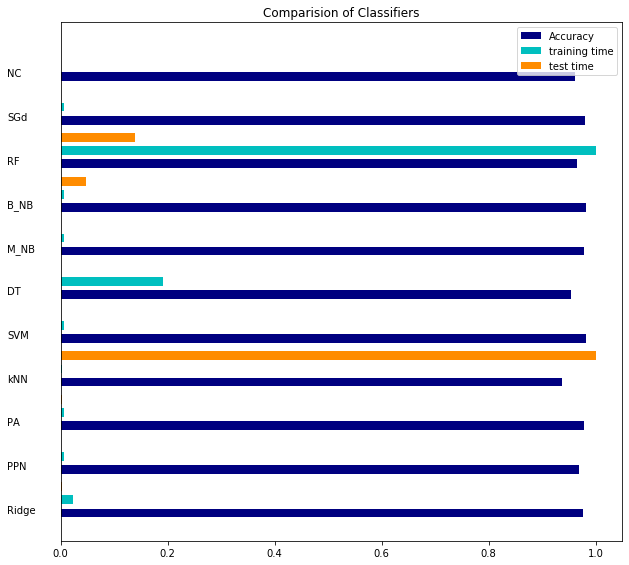

In [35]:
plt.figure(figsize=(12, 8))
plt.title("Comparision of Classifiers")
plt.barh(indices, score, .2, label="Accuracy", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, name1):
    plt.text(-.1, i, c)

plt.show()